<a href="https://colab.research.google.com/github/yujiimt/time_series/blob/master/ARMA%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
icecream = pd.read_csv('/content/icecream.csv')

y = pd.Series(icecream.expenditure_yen.values, 
              index = pd.date_range('2003-1', periods = len(icecream), freq ='M'))

y_diff = y.diff()[:100].dropna()

In [7]:
#ARMRモデル

from  statsmodels.tsa import stattools


#次数選択の指標としてAICとBICを使用する
info_criteria = stattools.arma_order_select_ic(y_diff, ic = ['aic', 'bic'])
#AIC と BICが最小のなる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

((2, 2), (2, 2))

In [11]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(y_diff, (4, 2))
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

<BarContainer object of 99 artists>

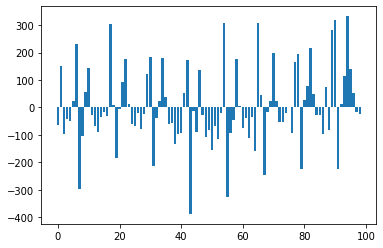

In [12]:

#残差の抽出
res = results.resid

#残差の出力
plt.bar(range(len(res)), res)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


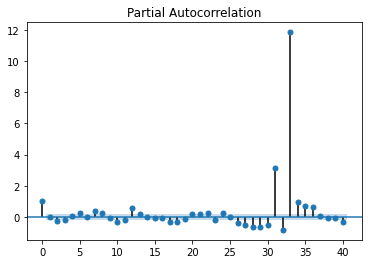

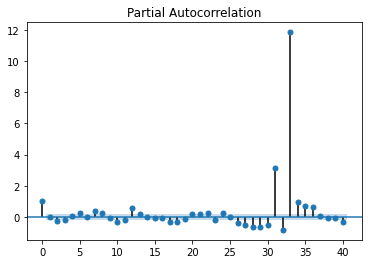

In [13]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res, lags = 40)

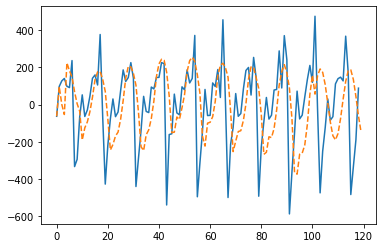

In [15]:
#1次階差系列の表示

plt.plot(y.diff().dropna().values, label='observation')
plt.plot(np.hstack([y_diff[:2],
                    results.fittedvalues,
                    results.predict(99-2, 115, dynamic =True)]),
         '--', label = 'forecast')

In [0]:
#ARIMA モデル

import requests
import io

url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

df_content = content.copy()

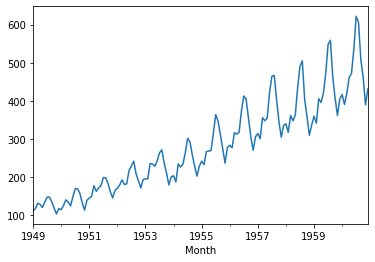

In [17]:
df_content['Month'] = pd.to_datetime(df_content['Month'],
                                     infer_datetime_format = True)
y = pd.Series(df_content['#Passengers'].values, index = df_content['Month'])
y = y.astype('f')
y.plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<BarContainer object of 119 artists>

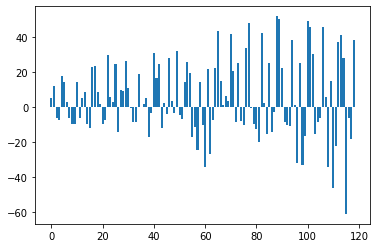

In [20]:
from statsmodels.tsa.arima_model import ARIMA

#yは上のコードで取得した月ごとの旅客機の乗客数データ
y120 = y[:120]
#階差をとらないモデル(p=3, d=0, q=2)
#グリッドサーチなどを用いて機械的に次数を求めることができるが、ここでは天下り的に与えておく

model_d0 = ARIMA(y120, (3, 0, 2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
#残差の出力

plt.bar(range(len(res_d0[1:])), res_d0[1:])

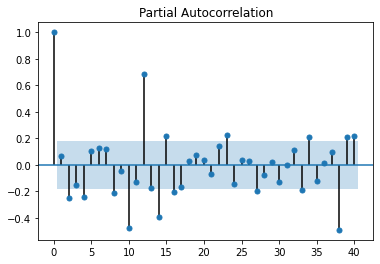

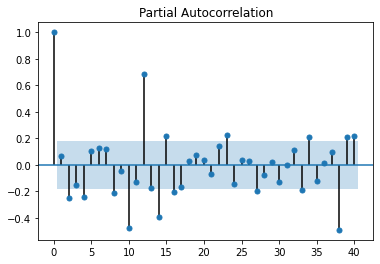

In [22]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res_d0[1:], lags= 40)

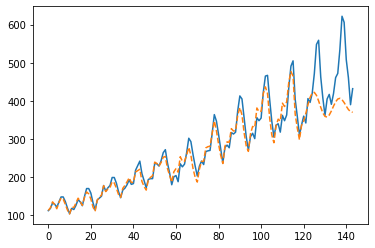

In [24]:
#原系列の表示
plt.plot(y.values, label ='observation')

#インサンプル(学習に使ったサンプルデータ)と
#ARIMA(3, 0, 2)による予測値を含めた系列の表示
#ARモデルのときとpredictの挙動が異なるので要注意

plt.plot(results_d0.predict(1, len(y)).values,
         '--', label = 'forecast')


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<BarContainer object of 119 artists>

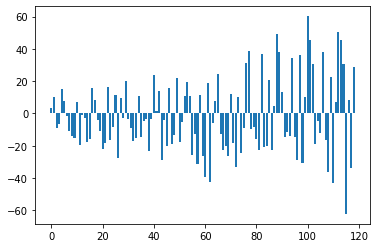

In [26]:
#階差１を取ったモデル(p=4, d=1, q=1)
model_d1 = ARIMA(y120, (4, 1, 1))
results_d1 = model_d1.fit()
res_d1 = results_d1.resid

#残差の出力
plt.bar(range(len(res_d1)), res_d1)

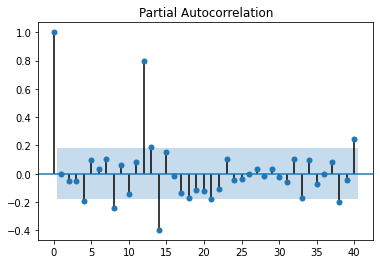

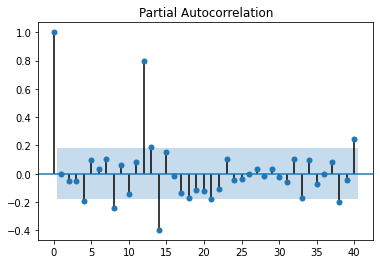

In [27]:
tsaplots.plot_pacf(res_d1, lags = 40)

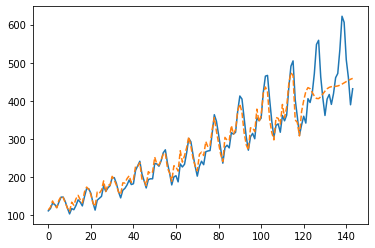

In [28]:
#原系列の表示
plt.plot(y.values, label = 'observation')
#インサンプル(学習に使ったサンプルデータ)と
#ARIMA(4, 1, 1)による予測値を含めた系列の表示
#階差をとっているためインサンプルを元データの形に戻すため
#typオプションに'levels'を指定している
plt.plot(results_d1.predict(1, len(y), typ = 'levels').values,
         '--', label = 'forecast')

In [0]:
def create_data(data_length, arl=1, set_std=1, y0=0, random_seed=555):
  np.random.seed(random_seed)
  cur_y = y0
  val_list = []
  y_t2 = 0
  e_ma = np.random.normal(loc=0, scale=set_std)

  for i in range(data_length):
    val_list.append(cur_y)
    if i > 0:
      y_t2 = val_list[-2]
    e_0 = np.random.normal(loc=0, scale = set_std)
    cur_y = 0.5 + cur_y + (cur_y - y_t2) - 2*e_m1
    e_m1 = e_0
  return val_list